
<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding: 40px; background-color:#7FDBFF;color: Black;font-weight: bold;
          text-align: center; font-size:280%;border-radius:10px 10px;">PCA And T-SNE On MNIST Dataset</p


![](https://miro.medium.com/max/1156/1*Tom80X_DVuAhT4p6SiKLIA.gif) 

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding: 20px; background-color:#0DFFFF;color: Black;font-weight: bold;
          text-align: center; font-size:250%;border-radius:20px 80px;">Importing library</p>

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler,MinMaxScaler,PowerTransformer,FunctionTransformer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression,RidgeClassifier,LassoCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE
import random
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#Load the dataset and check the data head.
#load the dataset
df=pd.read_csv("train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#check the rows and columns number.
print(f"number of rows:--> {df.shape[0]} and number of columns:--> {df.shape[1]}")

number of rows:--> 42000 and number of columns:--> 785


In [5]:
y = df["label"]
X = df.drop("label",1)

In [6]:
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<a id="7.2"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;"> 🐱‍🏍Split data</p>

In [7]:
#It is a good practise to split the data to avoiding the data leakage 
#train test split  
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("X_train shape: ",x_train.shape)
print("X_test shape: ",x_test.shape)
print()
print("Y_train shape: ",y_train.shape)
print("Y_test shape: ",y_test.shape)

X_train shape:  (33600, 784)
X_test shape:  (8400, 784)

Y_train shape:  (33600,)
Y_test shape:  (8400,)


In [8]:
# Convert into array
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

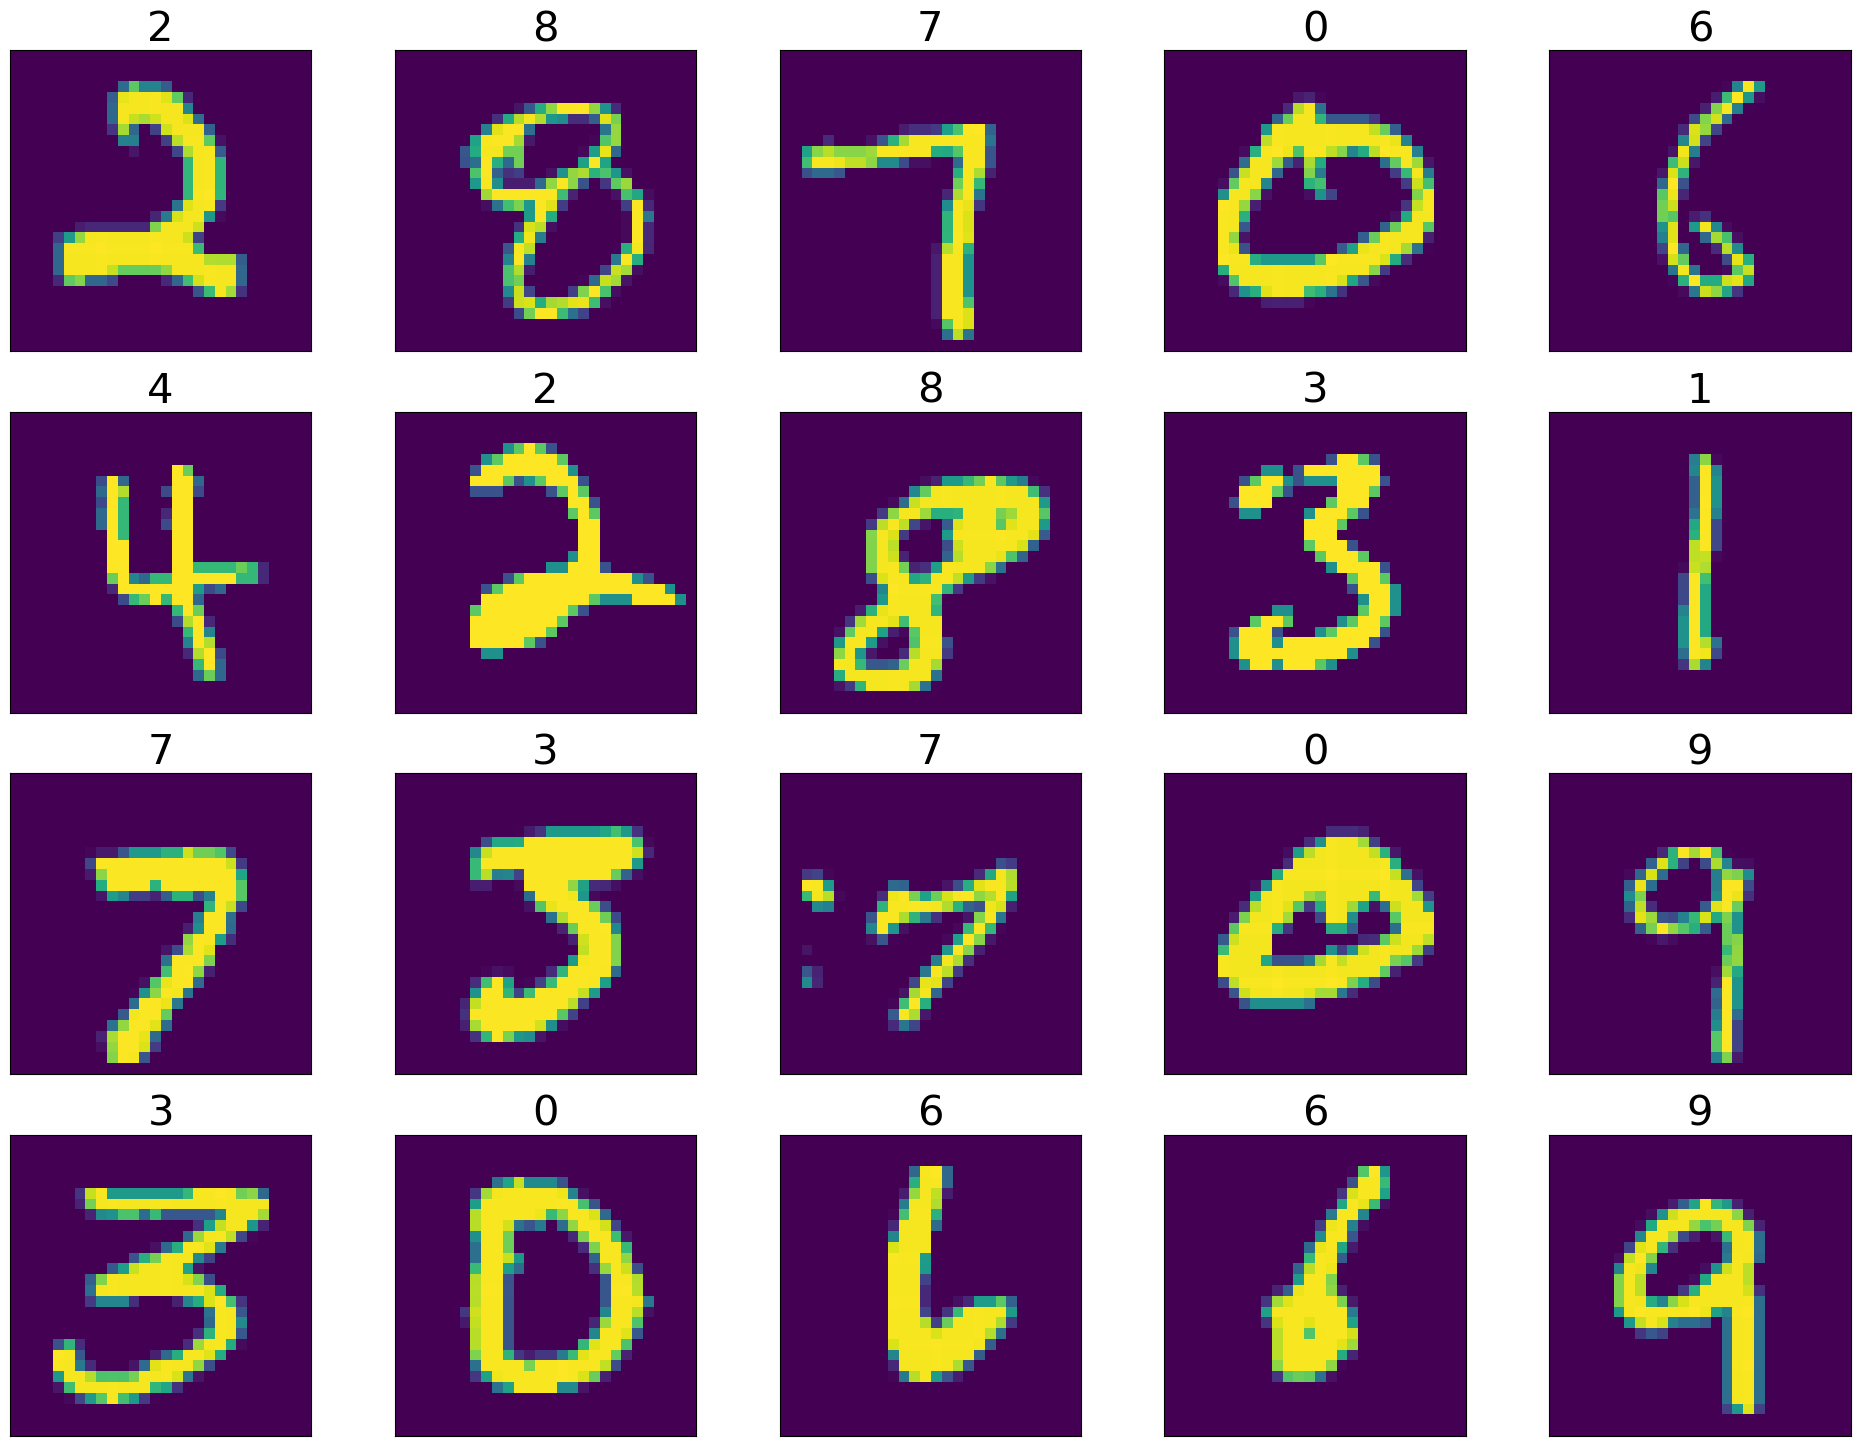

In [9]:
# show the original image
fig = plt.figure(figsize=(24, 18))
for i in range(20):
    idx = random.randint(1, 30000)
    ax = fig.add_subplot(4, 5, i+1, xticks=[], yticks=[])
    ax.imshow(x_train[idx].reshape(28, 28))
    ax.set_title(str(y_train[idx]),fontsize=30)

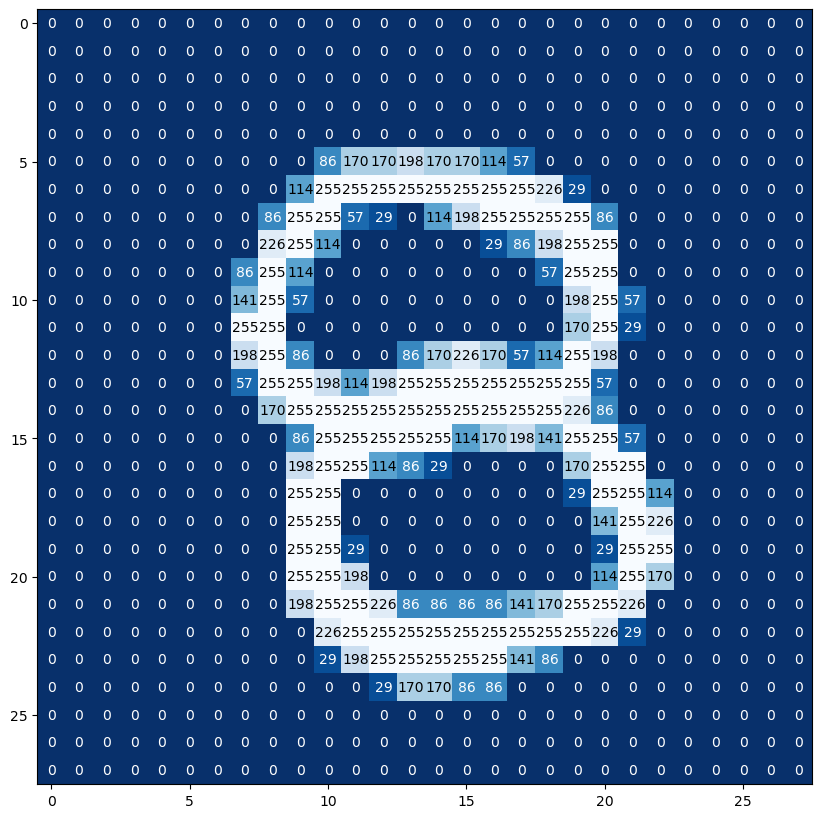

In [10]:
# visualize the image with pixel value representations
img = x_train[5].reshape(28, 28)

fig = plt.figure(figsize = (10,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='Blues_r')
width, height = img.shape[0],img.shape[1]
thresh = img.max()/2.5

#print(img.max())
#print(thresh)
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x), # Annotate the point xy with text text.In the simplest form, the text is placed at xy.
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

Text(0, 0.5, 'count')

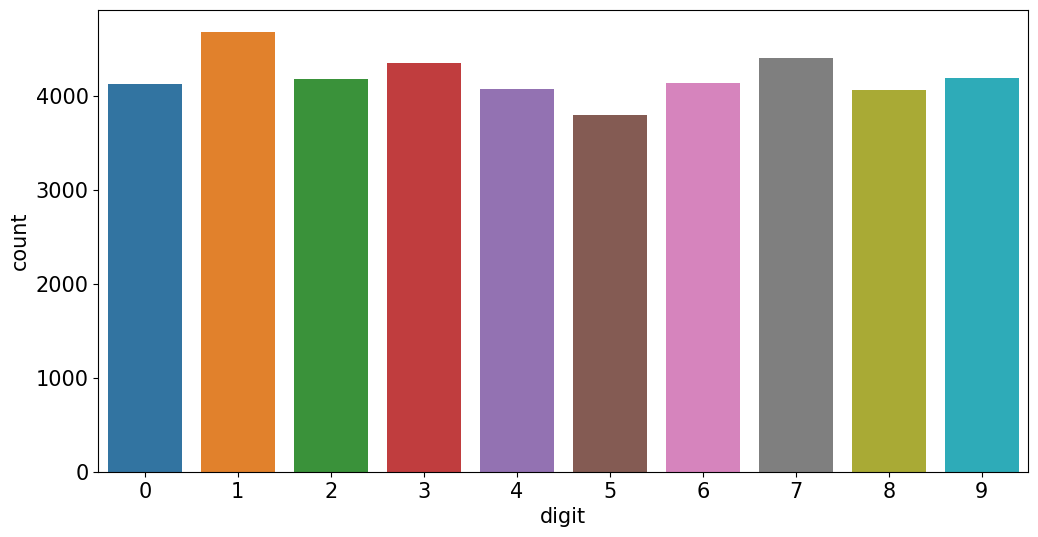

In [11]:
# Count the target category
plt.figure(figsize=(12,6))
sns.countplot(x=df["label"])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("digit",fontsize=15)
plt.ylabel("count",fontsize=15)

<a id="7.3"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;"> 🎯Scaling the features</p>

In [12]:
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)

#x_train = pd.DataFrame(x_train_scaled, columns = x_train.columns[:])
#x_test = pd.DataFrame(x_test_scaled, columns = x_test.columns[:])
x_train_scaled[10]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -5.90395033e-03, -7.69030123e-03, -5.45552844e-03, -5.45552844e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -5.45552844e-03, -1.04208431e-02, -1.30479198e-02,
       -1.64226616e-02, -2.02464092e-02, -2.36347357e-02, -2.75343230e-02,
       -3.10564920e-02, -3.15227543e-02, -3.18771916e-02, -2.90165470e-02,
       -2.83993876e-02, -2.75863977e-02, -2.45314036e-02, -1.95599047e-02,
       -1.70076952e-02, -1.04011821e-02, -5.45552844e-03, -5.45552844e-03,
        0.00000000e+00,  

<a id="7.2"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;"> 🐱‍🏍Applying PCA</p>

<a id="7.3"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;"> 🎯PCA with all dimension</p>

In [13]:

from sklearn.decomposition import PCA
pca=PCA(n_components=None)
x_train_new=pca.fit_transform(x_train_scaled)
x_test_new=pca.transform(x_test_scaled)

In [14]:
x_train_new.shape

(33600, 784)

In [15]:
x_train_new

array([[-2.71863253e+00, -4.89824095e-01,  1.13549660e+00, ...,
         0.00000000e+00,  0.00000000e+00, -0.00000000e+00],
       [-6.76980150e-01, -6.75362491e+00, -2.33590139e+00, ...,
        -1.29957857e-15, -3.54527835e-17, -1.19455766e-16],
       [-3.03323281e+00,  6.50981624e+00,  7.49182983e+00, ...,
        -1.10615483e-15,  7.42506024e-16, -1.42896439e-15],
       ...,
       [ 2.14883643e+00,  7.80794439e-01, -7.47387739e-01, ...,
        -1.90491109e-17, -2.37835214e-17,  4.53981387e-18],
       [ 1.05957006e+00,  9.47673116e-01,  3.94973114e+00, ...,
        -8.32539200e-18,  6.62622318e-18, -1.45026702e-17],
       [ 1.77025845e+01,  1.96188185e+00, -4.94352837e+00, ...,
        -3.42688254e-17,  1.72588903e-17, -1.04710826e-17]])

In [16]:
pca.explained_variance_ratio_

array([5.78519225e-02, 4.14926968e-02, 3.80423901e-02, 2.96626277e-02,
       2.58156168e-02, 2.25498018e-02, 1.97306802e-02, 1.77527998e-02,
       1.56865066e-02, 1.43606328e-02, 1.37025484e-02, 1.22725500e-02,
       1.14691200e-02, 1.12302739e-02, 1.05852885e-02, 1.01993106e-02,
       9.57676152e-03, 9.42708817e-03, 9.12489429e-03, 8.90170190e-03,
       8.39940495e-03, 8.20063196e-03, 7.85303229e-03, 7.56739707e-03,
       7.37261022e-03, 7.01884653e-03, 6.97919728e-03, 6.71104483e-03,
       6.39845030e-03, 6.30337291e-03, 6.15350848e-03, 6.02388659e-03,
       5.83673972e-03, 5.78547759e-03, 5.72333148e-03, 5.46399774e-03,
       5.43207369e-03, 5.28172755e-03, 5.13381744e-03, 4.94015474e-03,
       4.87671103e-03, 4.81978768e-03, 4.68204430e-03, 4.59342487e-03,
       4.57660834e-03, 4.49219022e-03, 4.44682221e-03, 4.41540749e-03,
       4.35111936e-03, 4.32032928e-03, 4.21808870e-03, 4.18243127e-03,
       4.07994349e-03, 4.02004913e-03, 3.98335855e-03, 3.94598812e-03,
      

## Number of PCA WRT varience

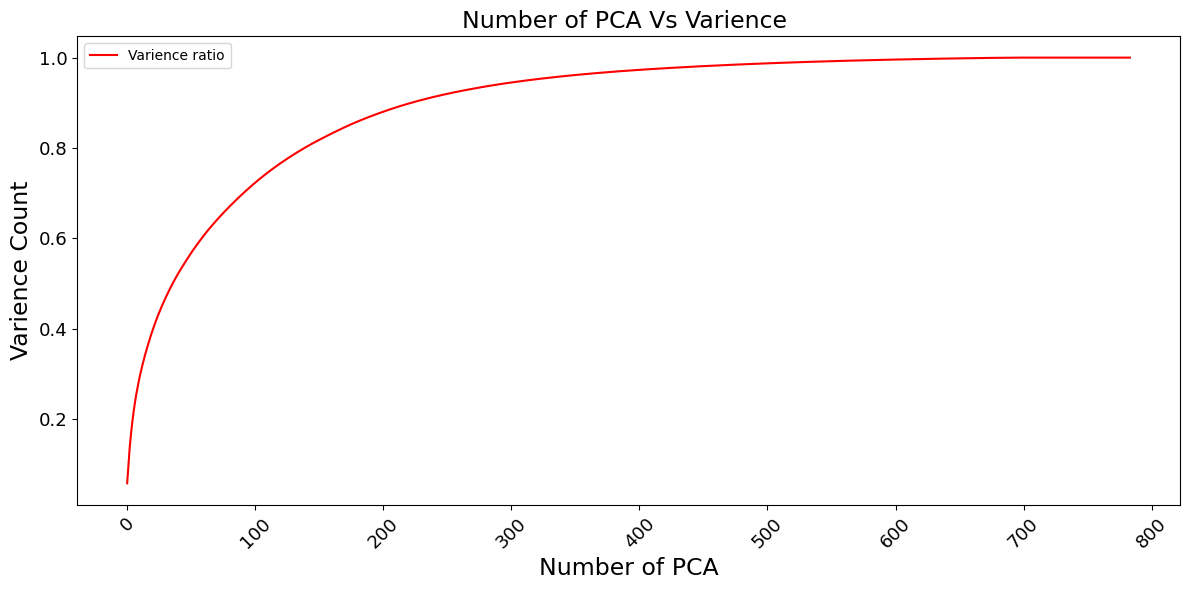

In [17]:
plt.figure(figsize=(12,6))
# Create the line plot
plt.plot(np.cumsum(pca.explained_variance_ratio_), linestyle='-', color='red', label='Varience ratio')
# Add labels and title
plt.xlabel('Number of PCA',fontsize=17)
plt.ylabel('Varience Count',fontsize=17)
plt.title('Number of PCA Vs Varience ',fontsize=17)
plt.xticks(rotation=45,fontsize=13)
plt.yticks(fontsize=13)

# Show the legend
plt.legend()

# Display the line plot
plt.tight_layout()  # Adjusts the layout to prevent overlapping labels
plt.show()

In [18]:
n_components_array=([1,2,3,4,5,10,20,50,100,200,500])
vr = np.zeros(len(n_components_array))
i=0;
for n_components in n_components_array:
    pca = PCA(n_components=n_components)
    pca.fit(x_train_scaled)
    vr[i] = sum(pca.explained_variance_ratio_)
    i=i+1 

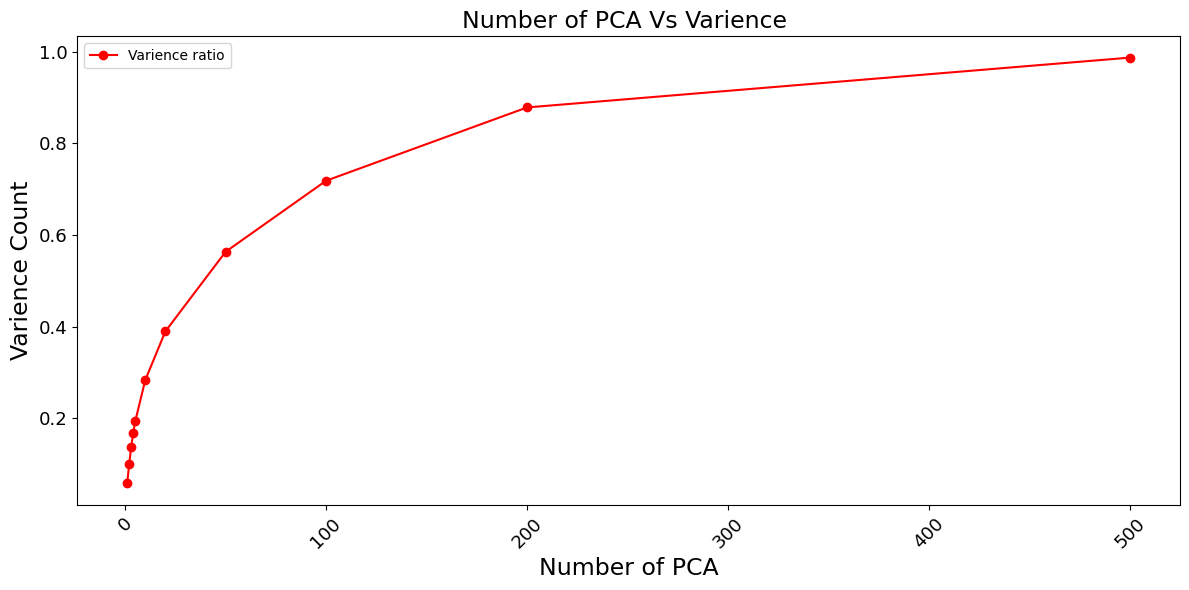

In [19]:
plt.figure(figsize=(12,6))
# Create the line plot
plt.plot(n_components_array,vr, marker="o" ,linestyle='-', color='red', label='Varience ratio')
# Add labels and title
plt.xlabel('Number of PCA',fontsize=17)
plt.ylabel('Varience Count',fontsize=17)
plt.title('Number of PCA Vs Varience ',fontsize=17)
plt.xticks(rotation=45,fontsize=13)
plt.yticks(fontsize=13)

# Show the legend
plt.legend()

# Display the line plot
plt.tight_layout()  # Adjusts the layout to prevent overlapping labels
plt.show()

## Number of PCA WRT Accuracy changes

In [20]:
clf = KNeighborsClassifier()
n_components_array=([2,3,4,5,10,20,50,100,200,500])
score_array = np.zeros(len(n_components_array))
i=0

for n_components in n_components_array:
    pca1 = PCA(n_components=n_components)
    pcaa = pca1.fit_transform(x_train_scaled)
    transform = pca1.transform(x_test_scaled)
    clf.fit(pcaa,y_train)
    y_pred= clf.predict(transform)
    score_array[i] = accuracy_score(y_test,y_pred)
    i=i+1

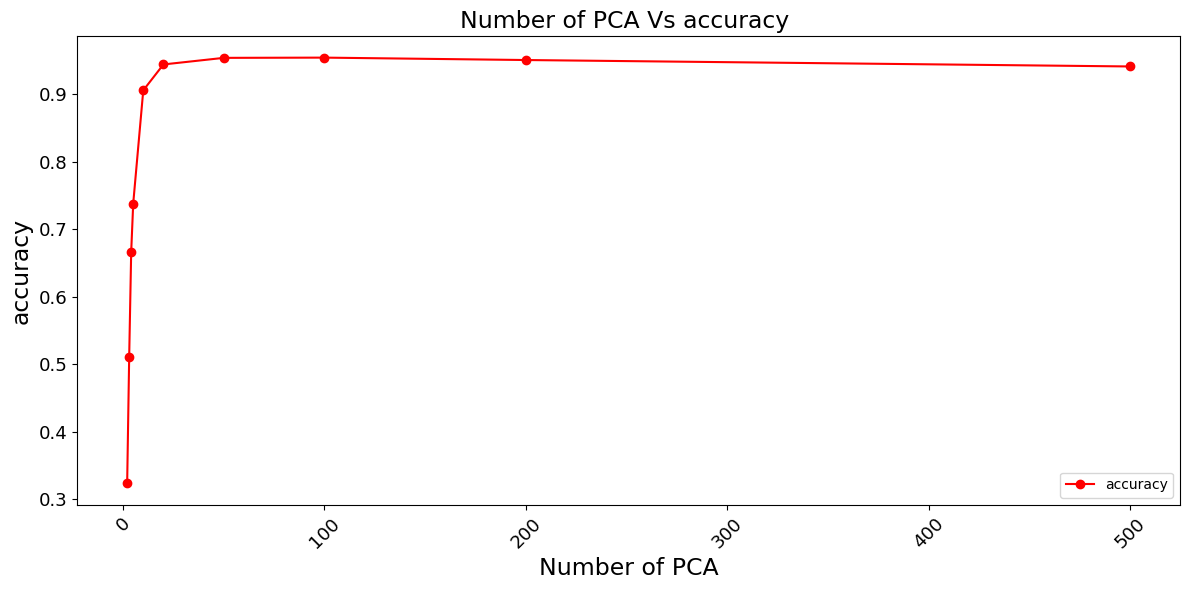

In [21]:
plt.figure(figsize=(12,6))
# Create the line plot
plt.plot(n_components_array,score_array, marker="o" ,linestyle='-', color='red', label='accuracy')
# Add labels and title
plt.xlabel('Number of PCA',fontsize=17)
plt.ylabel('accuracy',fontsize=17)
plt.title('Number of PCA Vs accuracy ',fontsize=17)
plt.xticks(rotation=45,fontsize=13)
plt.yticks(fontsize=13)

# Show the legend
plt.legend()

# Display the line plot
plt.tight_layout()  # Adjusts the layout to prevent overlapping labels
plt.show()

<a id="7.3"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;"> 🎯PCA with 2 dimension</p>

In [22]:
pca2=PCA(n_components=2)
x_train_new1=pca2.fit_transform(x_train_scaled)
x_test_new1=pca2.transform(x_test_scaled)

In [23]:
x_train_new1.shape

(33600, 2)

In [24]:
x_test_new1

array([[-5.00669557, -2.63020129],
       [-7.75779705, -1.47424768],
       [-7.47285017,  1.6183289 ],
       ...,
       [ 2.40771583, -1.55009265],
       [10.5573091 , -2.46750821],
       [-3.42369601,  5.09416514]])

In [25]:
x_train_new1

array([[-2.71862953, -0.48977308],
       [-0.6769813 , -6.75351224],
       [-3.03325628,  6.5098576 ],
       ...,
       [ 2.14886497,  0.78060779],
       [ 1.05957206,  0.94768042],
       [17.70258414,  1.96185855]])

In [26]:
pca2.explained_variance_ratio_

array([0.05785192, 0.0414927 ])

## train model with 2 PCA features

Accuracy :--->> 0.32404761904761903

              precision    recall  f1-score   support

           0       0.48      0.68      0.56       816
           1       0.71      0.87      0.78       909
           2       0.20      0.28      0.23       846
           3       0.17      0.16      0.16       937
           4       0.17      0.16      0.16       839
           5       0.20      0.20      0.20       702
           6       0.18      0.16      0.17       785
           7       0.42      0.40      0.41       893
           8       0.20      0.12      0.15       835
           9       0.26      0.18      0.21       838

    accuracy                           0.32      8400
   macro avg       0.30      0.32      0.30      8400
weighted avg       0.30      0.32      0.31      8400

Confusion matrix:--->>
 [[553   0 113  35  16  23  62   0  12   2]
 [  1 787   5   8  14  14  10  35  11  24]
 [172   3 235 132  71  54  87  27  42  23]
 [ 67  17 173 146 111  97 102  81  77  66]
 [ 53  5

<Axes: >

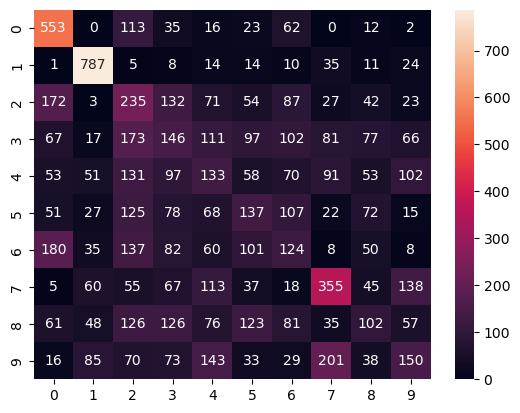

In [27]:
clf.fit(x_train_new1, y_train)
y_pred2=clf.predict(x_test_new1) 

print("Accuracy :--->>",accuracy_score(y_test,y_pred2))
print()
print(classification_report(y_test,y_pred2))
print("Confusion matrix:--->>\n",confusion_matrix(y_test,y_pred2)) 
print("\n<<<<------------------------------------------------------------->>>>\n")

sns.heatmap(confusion_matrix(y_test,y_pred2),label=["Negative", "Positive"],annot=True,fmt="1.0f")

## Visulaize the output in 2 dimension

Text(0, 0.5, 'PC2')

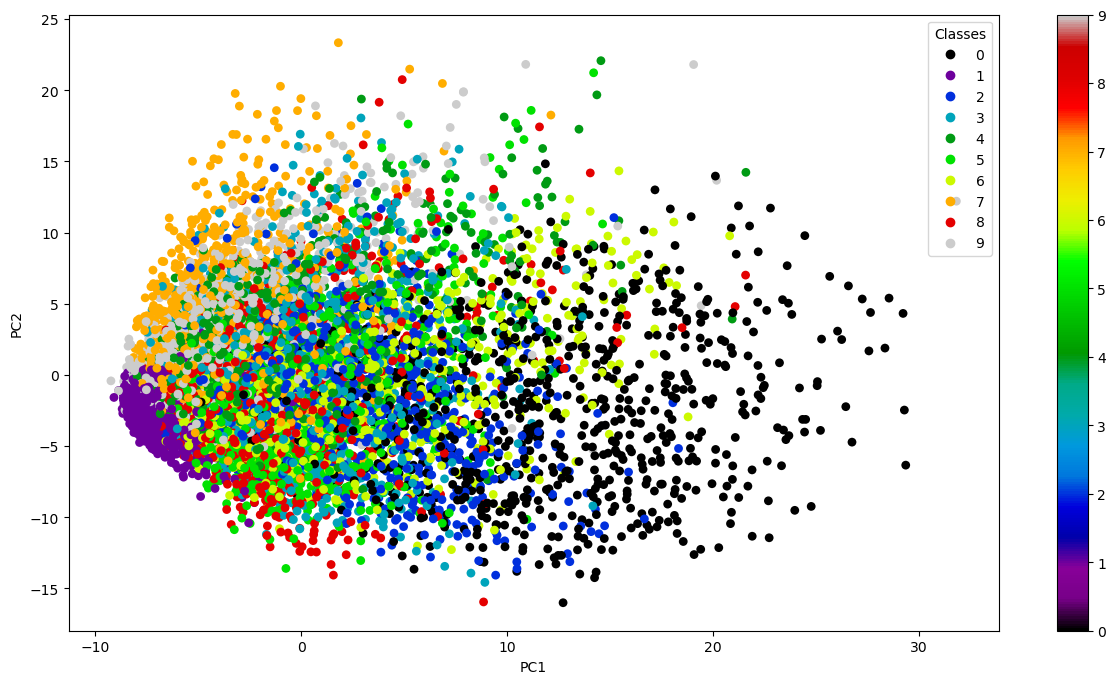

In [28]:
plt.figure(figsize=(15,8))
scatter = plt.scatter(x_test_new1[:,0],x_test_new1[:,1], s=40, c = y_test, cmap = "nipy_spectral", edgecolor = "None")
plt.colorbar()
# produce a legend with the unique colors from the scatter
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")
#plt.add_artist(legend1)
plt.clim(0,9)
plt.xlabel("PC1")
plt.ylabel("PC2")



In [29]:
import plotly.express as px
y_test11 = y_test.astype(str)
fig = px.scatter(df, x=x_test_new1[:,0], y=x_test_new1[:,1],
              color=y_test11,hover_data=[y_test11])
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

<a id="7.3"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;"> 🎯PCA with 3 dimension</p>

In [30]:
pca3=PCA(n_components=3)
x_train_new2=pca3.fit_transform(x_train_scaled)
x_test_new2=pca3.transform(x_test_scaled)

In [31]:
x_train_new2.shape

(33600, 3)

In [32]:
pca3.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

## train model with 3 pca features

Accuracy :--->> 0.5102380952380953

              precision    recall  f1-score   support

           0       0.63      0.78      0.69       816
           1       0.88      0.94      0.91       909
           2       0.47      0.51      0.49       846
           3       0.37      0.36      0.36       937
           4       0.43      0.55      0.48       839
           5       0.29      0.28      0.28       702
           6       0.42      0.45      0.44       785
           7       0.62      0.56      0.59       893
           8       0.33      0.20      0.24       835
           9       0.50      0.42      0.45       838

    accuracy                           0.51      8400
   macro avg       0.49      0.50      0.50      8400
weighted avg       0.50      0.51      0.50      8400

Confusion matrix:--->>
 [[636   0  34  12   9  30  73   1  21   0]
 [  0 859   3   8   1   5  20   1  10   2]
 [ 60   5 432 178  12  38  98   1  22   0]
 [ 22  27 236 337  46  69  98  14  84   4]
 [ 41   7

<Axes: >

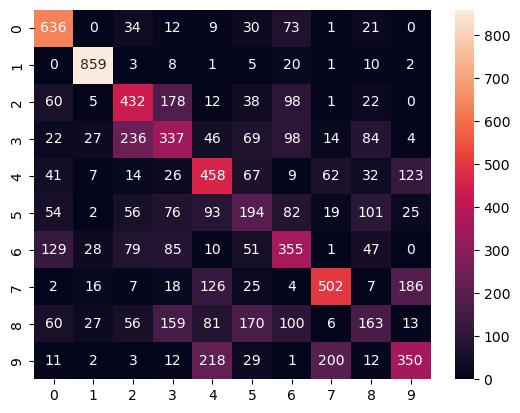

In [33]:
clf.fit(x_train_new2, y_train)
y_pred2=clf.predict(x_test_new2) 

print("Accuracy :--->>",accuracy_score(y_test,y_pred2))
print()
print(classification_report(y_test,y_pred2))
print("Confusion matrix:--->>\n",confusion_matrix(y_test,y_pred2)) 
print("\n<<<<------------------------------------------------------------->>>>\n")

sns.heatmap(confusion_matrix(y_test,y_pred2),label=["Negative", "Positive"],annot=True,fmt="1.0f")

## Visualize the output in 3 dimension

In [34]:
y_test11 = y_test.astype(str)
fig = px.scatter_3d(df, x=x_test_new2[:,0], y=x_test_new2[:,1],z=x_test_new2[:,2],
              color=y_test11)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

<a id="7.2"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;"> 🐱‍🏍Applying T-SNE</p>

 t-SNE is most useful as a visualization tool, not as a feature extraction method for supervised learning.

<a id="7.3"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;"> 🎯T-SNE with 2 dimension</p>

In [35]:
tsne=TSNE(n_components=2)
x_train_tsne=tsne.fit_transform(x_train_scaled)
x_test_tsne=tsne.fit_transform(x_test_scaled)

In [36]:
x_train_tsne.shape

(33600, 2)

In [37]:
x_train_tsne

array([[ 77.34317  , -54.225628 ],
       [ -2.6715138, -48.547024 ],
       [  3.2982173,   8.481995 ],
       ...,
       [ 27.904299 ,  39.62392  ],
       [ 71.084236 , -63.93935  ],
       [ 99.410164 ,  13.2664175]], dtype=float32)

## train the model with 2 T-sne features

Accuracy :--->> 0.920952380952381

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       816
           1       0.93      0.99      0.96       909
           2       0.94      0.92      0.93       846
           3       0.89      0.93      0.91       937
           4       0.93      0.92      0.92       839
           5       0.89      0.85      0.87       702
           6       0.95      0.97      0.96       785
           7       0.92      0.92      0.92       893
           8       0.94      0.86      0.90       835
           9       0.88      0.88      0.88       838

    accuracy                           0.92      8400
   macro avg       0.92      0.92      0.92      8400
weighted avg       0.92      0.92      0.92      8400

Confusion matrix:--->>
 [[788   1   7   2   0   3  11   0   2   2]
 [  0 900   3   0   1   0   2   1   2   0]
 [  7  10 779  15   5   3   9   4  11   3]
 [  4  10   9 872   1  17   1  12   6   5]
 [  1   9 

<Axes: >

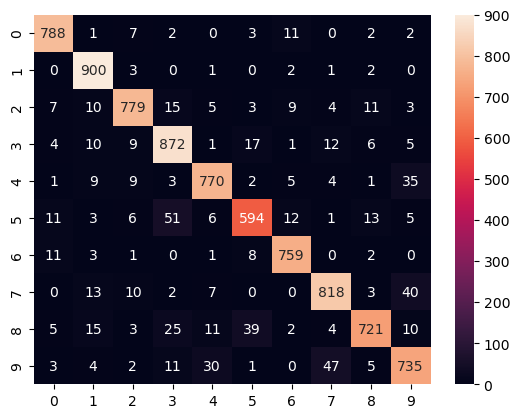

In [38]:
clf.fit(x_test_tsne, y_test)
y_pred3=clf.predict(x_test_tsne) 

print("Accuracy :--->>",accuracy_score(y_test,y_pred3))
print()
print(classification_report(y_test,y_pred3))
print("Confusion matrix:--->>\n",confusion_matrix(y_test,y_pred3)) 
print("\n<<<<------------------------------------------------------------->>>>\n")

sns.heatmap(confusion_matrix(y_test,y_pred3),label=["Negative", "Positive"],annot=True,fmt="1.0f")

## Visualize the output in 2 dimension

Text(0, 0.5, 'TSNE2')

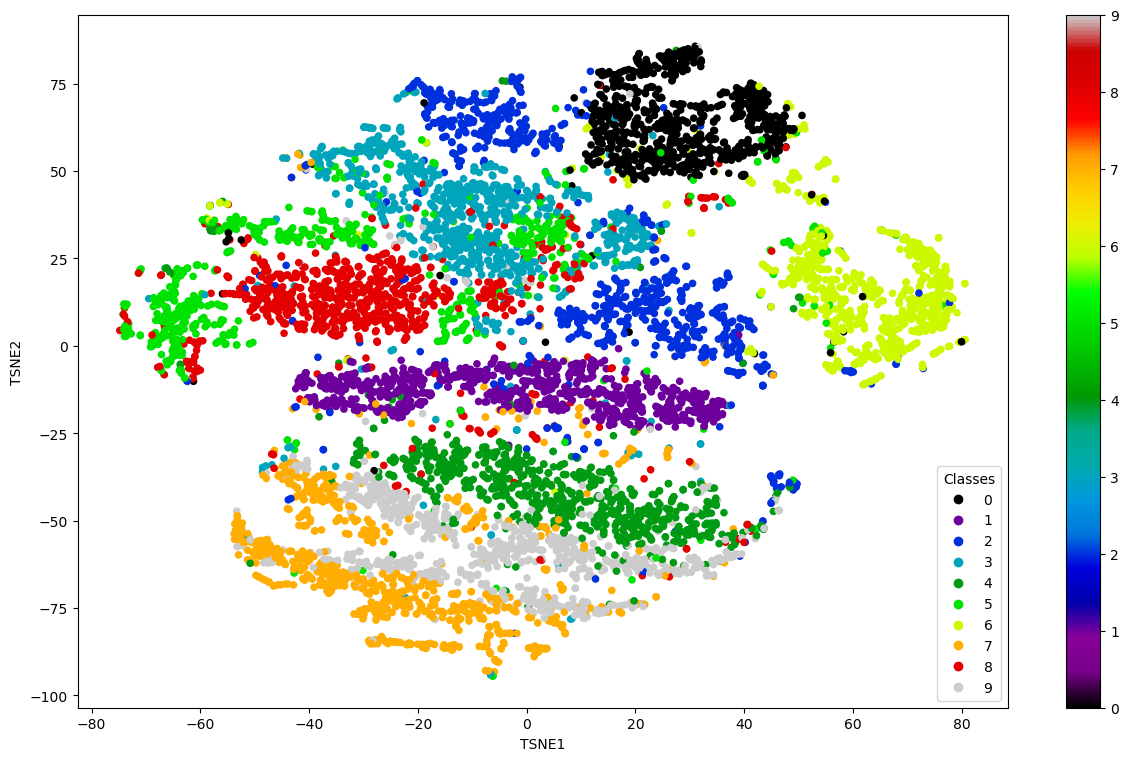

In [39]:
plt.figure(figsize=(15,9))
scatter = plt.scatter(x_test_tsne[:,0],x_test_tsne[:,1], s=30, c = y_test, cmap = "nipy_spectral", edgecolor = "None")
plt.colorbar()
# produce a legend with the unique colors from the scatter
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="lower right", title="Classes")
plt.clim(0,9)
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")

In [40]:
y_test11 = y_test.astype(str)
fig = px.scatter(df, x=x_test_tsne[:,0], y=x_test_tsne[:,1],
              color=y_test11,hover_data=[y_test11],height=600)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    template="plotly_dark",
)
fig.show()

<a id="7.3"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;"> 🎯T-SNE with 3 dimension</p>

In [41]:
tsne2=TSNE(n_components=3)
#x_train_tsne2=tsne2.fit_transform(x_train_scaled)
x_test_tsne2=tsne2.fit_transform(x_test_scaled)

In [42]:
x_test_tsne2.shape

(8400, 3)

In [43]:
x_test_tsne2

array([[ -8.507525  ,  -1.591273  ,   0.3862666 ],
       [  4.8138447 ,  14.460015  ,   0.39181402],
       [  2.20463   ,   3.1939757 , -23.834267  ],
       ...,
       [-17.923342  ,  -1.8055836 ,  12.893932  ],
       [  6.5215383 ,  -8.012496  ,  30.250946  ],
       [ 13.754528  ,  -5.8808866 , -11.31022   ]], dtype=float32)

## Train model with 3 t-sne features

Accuracy :--->> 0.9261904761904762

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       816
           1       0.93      0.99      0.96       909
           2       0.95      0.93      0.94       846
           3       0.89      0.92      0.91       937
           4       0.93      0.92      0.92       839
           5       0.91      0.87      0.89       702
           6       0.94      0.97      0.96       785
           7       0.93      0.92      0.92       893
           8       0.95      0.88      0.91       835
           9       0.88      0.89      0.88       838

    accuracy                           0.93      8400
   macro avg       0.93      0.93      0.93      8400
weighted avg       0.93      0.93      0.93      8400

Confusion matrix:--->>
 [[790   0   5   2   1   2  12   0   2   2]
 [  0 902   1   0   1   0   3   1   1   0]
 [  5  14 785  14   6   1   6   4   7   4]
 [  5   8   7 863   1  17   3  12  10  11]
 [  1   7

<Axes: >

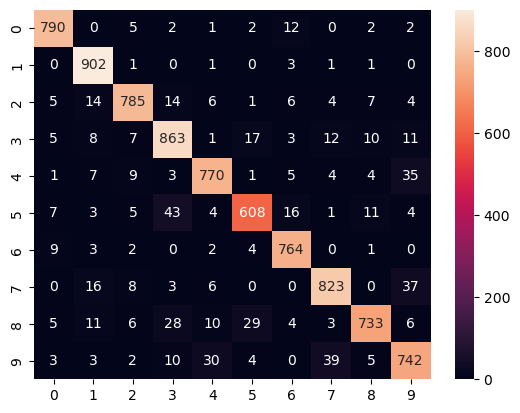

In [44]:
clf.fit(x_test_tsne2, y_test)
y_pred4=clf.predict(x_test_tsne2) 

print("Accuracy :--->>",accuracy_score(y_test,y_pred4))
print()
print(classification_report(y_test,y_pred4))
print("Confusion matrix:--->>\n",confusion_matrix(y_test,y_pred4)) 
print("\n<<<<------------------------------------------------------------->>>>\n")

sns.heatmap(confusion_matrix(y_test,y_pred4),label=["Negative", "Positive"],annot=True,fmt="1.0f")

## Visualize the output in 3 dimension

In [45]:
y_test11 = y_test.astype(str)
fig = px.scatter_3d(df, x=x_test_tsne2[:,0], y=x_test_tsne2[:,1],z=x_test_tsne2[:,2],
              color=y_test11,height=600)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

<a id="7.3"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;"> 🎯Applying U-MAP</p>

<a id="7.3"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;"> 🎯U-MAP with 2 dimension</p>

In [46]:
!pip install umap-learn


In [47]:
import umap.umap_ as umap
um = umap.UMAP(n_components=2)
x_train_u=um.fit_transform(x_train_scaled)
x_test_u=um.transform(x_test_scaled)


/opt/conda/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning:

The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.

/opt/conda/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning:

The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.

/opt/conda/lib/python3.10/site-packages/umap/distances.py:1086: NumbaDeprecationWarning:

The 'nopython' keyword argument was not supplied to th

In [48]:
x_train_u.shape

(33600, 2)

In [49]:
x_train_u

array([[12.499216  ,  4.6635585 ],
       [ 2.30819   , -2.3869843 ],
       [ 4.000415  ,  0.58272976],
       ...,
       [ 7.792408  ,  0.6695152 ],
       [12.2231045 ,  5.4755964 ],
       [12.936663  , -0.2077375 ]], dtype=float32)

## Train model with 2 UMAP features

Accuracy :--->> 0.8891666666666667

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       816
           1       0.91      0.99      0.95       909
           2       0.93      0.86      0.89       846
           3       0.86      0.88      0.87       937
           4       0.89      0.88      0.88       839
           5       0.82      0.80      0.81       702
           6       0.92      0.94      0.93       785
           7       0.90      0.87      0.88       893
           8       0.92      0.83      0.87       835
           9       0.81      0.85      0.83       838

    accuracy                           0.89      8400
   macro avg       0.89      0.89      0.89      8400
weighted avg       0.89      0.89      0.89      8400

Confusion matrix:--->>
 [[796   0   4   1   1   4   8   0   1   1]
 [  0 900   3   0   1   1   2   1   1   0]
 [ 12  22 729  22  15   3  14   6  15   8]
 [  4   7  11 822   1  43   3  16  19  11]
 [  2  13

<Axes: >

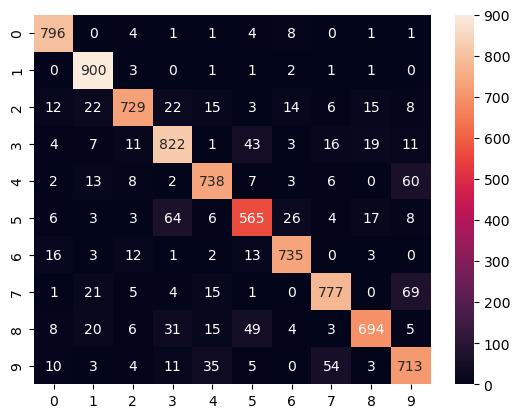

In [50]:
clf.fit(x_train_u, y_train)
y_pre=clf.predict(x_test_u) 

print("Accuracy :--->>",accuracy_score(y_test,y_pre))
print()
print(classification_report(y_test,y_pre))
print("Confusion matrix:--->>\n",confusion_matrix(y_test,y_pre)) 
print("\n<<<<------------------------------------------------------------->>>>\n")

sns.heatmap(confusion_matrix(y_test,y_pre),label=["Negative", "Positive"],annot=True,fmt="1.0f")

## visualize the output in 2 dimension

Text(0, 0.5, 'UMAP2')

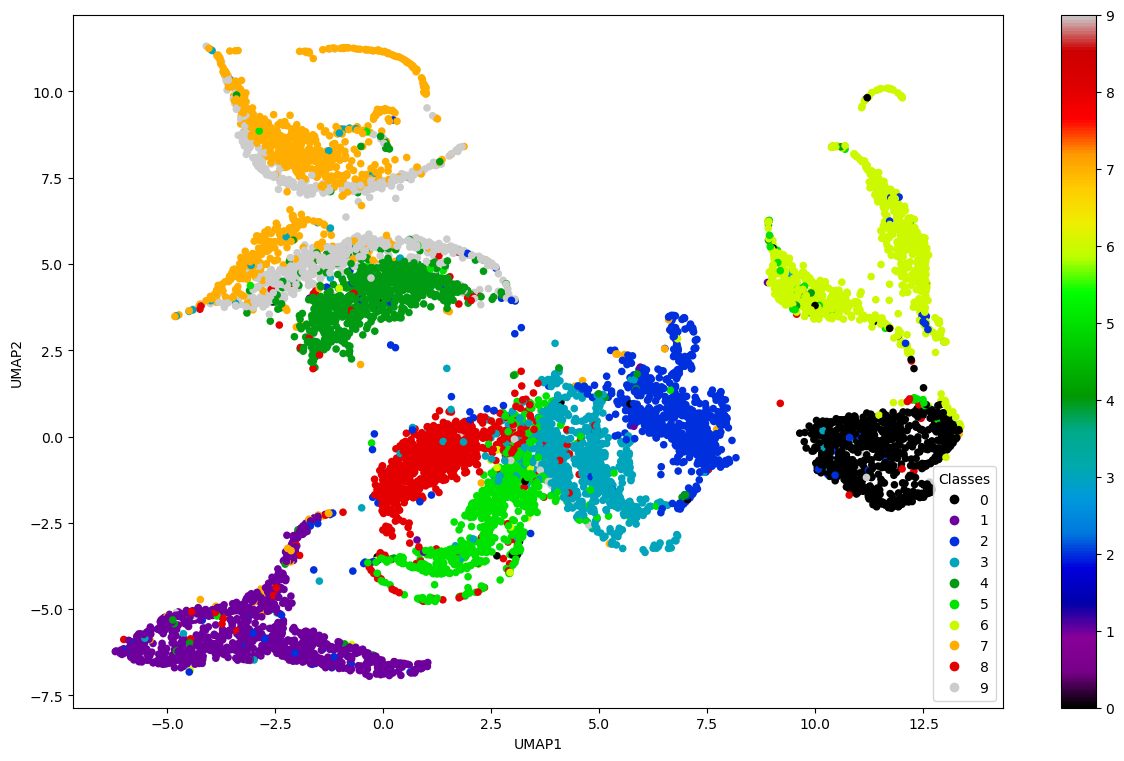

In [51]:
plt.figure(figsize=(15,9))
scatter = plt.scatter(x_test_u[:,0],x_test_u[:,1], s=30, c = y_test, cmap = "nipy_spectral", edgecolor = "None")
plt.colorbar()
# produce a legend with the unique colors from the scatter
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="lower right", title="Classes")
plt.clim(0,9)
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")

In [52]:
y_test11 = y_test.astype(str)
fig = px.scatter(df, x=x_test_u[:,0], y=x_test_u[:,1],
              color=y_test11,hover_data=[y_test11],height=600)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    template="plotly_dark",
)
fig.show()

<a id="7.3"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;"> 🎯U-MAP with 3 dimension</p>

In [53]:
um3 = umap.UMAP(n_components=3)
x_train_u3=um3.fit_transform(x_train_scaled)
x_test_u3=um3.transform(x_test_scaled)

In [54]:
x_train_u3.shape

(33600, 3)

In [55]:
x_train_u3

array([[-7.2644032e-03,  5.1511817e+00,  5.6796827e+00],
       [ 7.0247598e+00,  1.2713652e+01,  5.5261359e+00],
       [ 6.6973829e+00,  1.0579282e+01,  3.2816093e+00],
       ...,
       [ 3.8633063e+00,  8.3736286e+00,  5.3345895e+00],
       [-9.7516231e-02,  4.6803346e+00,  6.2972951e+00],
       [-1.1899376e+00,  9.4919405e+00,  4.2787194e+00]], dtype=float32)

## Train model with 3 UMAP features

Accuracy :--->> 0.9066666666666666

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       816
           1       0.91      0.99      0.95       909
           2       0.94      0.88      0.91       846
           3       0.91      0.91      0.91       937
           4       0.89      0.89      0.89       839
           5       0.87      0.87      0.87       702
           6       0.93      0.95      0.94       785
           7       0.91      0.87      0.89       893
           8       0.93      0.84      0.89       835
           9       0.83      0.87      0.85       838

    accuracy                           0.91      8400
   macro avg       0.91      0.91      0.91      8400
weighted avg       0.91      0.91      0.91      8400

Confusion matrix:--->>
 [[795   0   4   1   1   4  10   0   0   1]
 [  0 903   2   0   1   0   2   0   1   0]
 [ 12  19 742  12  20   3  13   4  15   6]
 [  4   6   9 849   4  24   2  15  15   9]
 [  1  12

<Axes: >

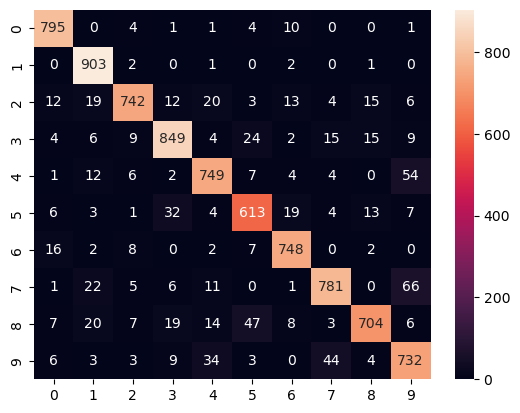

In [56]:
clf.fit(x_train_u3, y_train)
y_pre3=clf.predict(x_test_u3) 

print("Accuracy :--->>",accuracy_score(y_test,y_pre3))
print()
print(classification_report(y_test,y_pre3))
print("Confusion matrix:--->>\n",confusion_matrix(y_test,y_pre3)) 
print("\n<<<<------------------------------------------------------------->>>>\n")

sns.heatmap(confusion_matrix(y_test,y_pre3),label=["Negative", "Positive"],annot=True,fmt="1.0f")

## Visualize the output in 3 dimension

In [57]:
y_test11 = y_test.astype(str)
fig = px.scatter_3d(df, x=x_test_u3[:,0], y=x_test_u3[:,1],z=x_test_u3[:,2],
              color=y_test11,height=600)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()